## **Food & Beverage Industry Analysis**

CodeX is a German beverage company that is aiming to make its mark in the Indian market. A few months ago, they launched their energy drink in 10 cities in India. Their Marketing team is responsible for increasing brand awareness, market share, and product development. They conducted a survey in those 10 cities and received results from 10k respondents.

Working as a marketing data analyst, it's my task to convert these survey results to meaningful insights which the team can use to drive actions.

#### **1. Data Pre-processing**
 - 1.1 Import librabries
 - 1.2 Read files
 - 1.3 Check null, NA, unique and duplicated values
 - 1.4 Merge files

##### 1.1 Import librabries

In [ ]:
# Import librabries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

##### 1.2 Read files

In [ ]:
# Read files
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Self_projects/F&B_Industry_Analysis/survey.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Self_projects/F&B_Industry_Analysis/repondents.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Self_projects/F&B_Industry_Analysis/cities.csv')

##### 1.3 Check null, NA, unique and duplicated values
*Note: Due to the size of each file, df3 is the only file that we can do manually check*

In [ ]:
# df unique and null check
df_object_columns = list(df.select_dtypes(['object']).columns)
df_number_columns = list(df.select_dtypes(['number']).columns)

In [ ]:
# Check unique and null for df object columns
for column in df_object_columns:
  print('Column: {}'.format(column))
  print(len(df[column].unique()),'unique values', '   &   ',
        df[column].notnull().sum(),'non-null values','   &   ',
        round(df[column].notnull().sum()/len(df[column])*100,2),'% non-null'
  )

Column: Consume_frequency
5 unique values    &    10000 non-null values    &    100.0 % non-null
Column: Consume_time
4 unique values    &    10000 non-null values    &    100.0 % non-null
Column: Consume_reason
5 unique values    &    10000 non-null values    &    100.0 % non-null
Column: Heard_before
2 unique values    &    10000 non-null values    &    100.0 % non-null
Column: Brand_perception
3 unique values    &    10000 non-null values    &    100.0 % non-null
Column: General_perception
4 unique values    &    10000 non-null values    &    100.0 % non-null
Column: Tried_before
2 unique values    &    10000 non-null values    &    100.0 % non-null
Column: Reasons_preventing_trying
5 unique values    &    10000 non-null values    &    100.0 % non-null
Column: Current_brands
7 unique values    &    10000 non-null values    &    100.0 % non-null
Column: Reasons_for_choosing_brands
5 unique values    &    10000 non-null values    &    100.0 % non-null
Column: Improvements_desired
5 un

In [ ]:
# Check unique and null values for df number columns
for column in df_number_columns:
  print('Column: {}'.format(column))
  print(len(df[column].unique()),'unique values','   &   ',
        df[column].notnull().sum(),'non-null values','   &   ',
        round(df[column].notnull().sum()/len(df[column])*100,2),'% non-null'
  )

Column: Response_ID
10000 unique values    &    10000 non-null values    &    100.0 % non-null
Column: Respondent_ID
10000 unique values    &    10000 non-null values    &    100.0 % non-null
Column: Taste_experience
5 unique values    &    10000 non-null values    &    100.0 % non-null


In [ ]:
# Check NA rows for df
df.isna().sum()
# => There no NA rows in df

Response_ID                       0
Respondent_ID                     0
Consume_frequency                 0
Consume_time                      0
Consume_reason                    0
Heard_before                      0
Brand_perception                  0
General_perception                0
Tried_before                      0
Taste_experience                  0
Reasons_preventing_trying         0
Current_brands                    0
Reasons_for_choosing_brands       0
Improvements_desired              0
Ingredients_expected              0
Health_concerns                   0
Interest_in_natural_or_organic    0
Marketing_channels                0
Packaging_preference              0
Limited_edition_packaging         0
Price_range                       0
Purchase_location                 0
Typical_consumption_situations    0
dtype: int64

In [ ]:
# Check duplicated rows for df
df.duplicated().sum()
# => There are no duplicated rows in df

0

In [ ]:
# df2 unique and null check
df2_object_columns = list(df2.select_dtypes(['object']).columns)
df2_number_columns = list(df2.select_dtypes(['number']).columns)

In [ ]:
# Check unique and null values for df2 object columns
for column in df2_object_columns:
  print('Column: {}'.format(column))
  print(len(df2[column].unique()),'unique values','   &   ',
        df2[column].notnull().sum(),'non-null values','   &   ',
        round(df2[column].notnull().sum()/len(df2[column])*100,2),'% non-null'
  )

Column: Name
9487 unique values    &    10000 non-null values    &    100.0 % non-null
Column: Age
5 unique values    &    10000 non-null values    &    100.0 % non-null
Column: Gender
3 unique values    &    10000 non-null values    &    100.0 % non-null
Column: City_ID
10 unique values    &    10000 non-null values    &    100.0 % non-null


In [ ]:
# Check unique and null values for df2 number columns:
for column in df2_number_columns:
  print('Column: {}'.format(column))
  print(len(df2[column].unique()),'unique vales','   &   ',
        df2[column].notnull().sum(),'non-null values','   &   ',
        round(df2[column].notnull().sum()/len(df2[column])*100,2),'% non-null'
  )

Column: Respondent_ID
10000 unique vales    &    10000 non-null values    &    100.0 % non-null


In [ ]:
# Check NA rows for df2
df2.isna().sum()
# => There are no NA rows in df2

Respondent_ID    0
Name             0
Age              0
Gender           0
City_ID          0
dtype: int64

In [ ]:
# Check duplicated rows for df2
df2.duplicated().sum()
# => There are no duplicated rows in df2

0

##### 1.4 Merge files

In [ ]:
df = pd.merge(df,df2,left_on='Respondent_ID',right_on='Respondent_ID',how='inner')
df.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,Pranay Chand,31-45,Female,CT113
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late,Mohanlal Joshi,19-30,Female,CT120


In [ ]:
df.shape

(10000, 27)

In [ ]:
df = pd.merge(df,df3,left_on='City_ID',right_on='City_ID',how='inner')
df.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103025,120055,Once a week,Before exercise,To enhance sports performance,Yes,Neutral,Effective,Yes,3,...,No,Above 150,Gyms and fitness centers,Studying/working late,Umang Sarkar,31-45,Non-binary,CT117,Ahmedabad,Tier 2
2,103027,120057,Daily,Before exercise,To boost performance,No,Neutral,Healthy,No,2,...,No,50-99,Online retailers,Sports/exercise,Kanav Thaman,19-30,Male,CT117,Ahmedabad,Tier 2
3,103048,120078,Rarely,Before exercise,To enhance sports performance,No,Neutral,Dangerous,No,3,...,Not Sure,100-150,Supermarkets,Sports/exercise,Suhana Ramakrishnan,19-30,Female,CT117,Ahmedabad,Tier 2
4,103068,120098,Daily,Throughout the day,Other,No,Neutral,Effective,No,4,...,Yes,100-150,Other,Studying/working late,Saira Sridhar,19-30,Male,CT117,Ahmedabad,Tier 2


In [ ]:
df.shape

(10000, 29)

#### **2. Findings and Analysis**
- 2.1 Demographic Insights
- 2.2 Customer Preferences
- 2.3 Competition Analysis
- 2.4 Marketing Channels and Brand Awareness
- 2.5 Brand Penetration
- 2.6 CodeX Product Development

##### 2.1 Demographic Insights

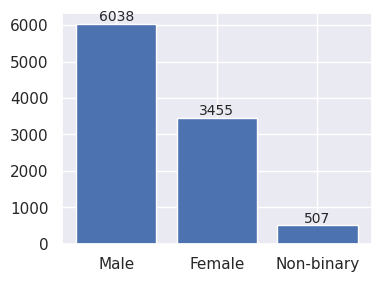

In [ ]:
# Customer genders
fig, ax = plt.subplots(figsize=(4, 3))
d = df['Gender'].value_counts()
p = ax.bar(d.index, d.values)
ax.bar_label(p,fontsize=10)
fig.show()

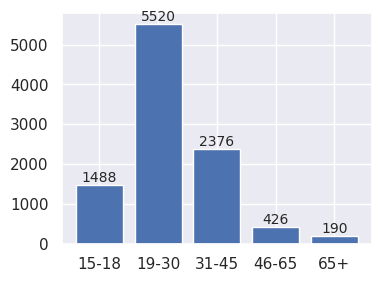

In [ ]:
# Customer age groups
fig, ax = plt.subplots(figsize=(4,3))
d = df['Age'].value_counts().sort_index()
p = ax.bar(d.index, d.values)
ax.bar_label(p,fontsize=10)
fig.show()
# => Most of customers are from 19 - 30 year old

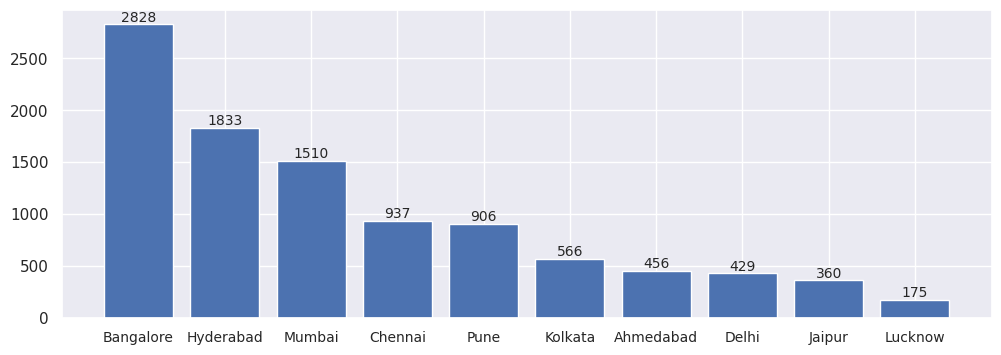

In [ ]:
# Customer cities
fig, ax = plt.subplots(figsize = (12,4))
d = df['City'].value_counts()
p = ax.bar(d.index, d.values)
ax.bar_label(p, fontsize=10)
plt.xticks(fontsize=10)
fig.show()

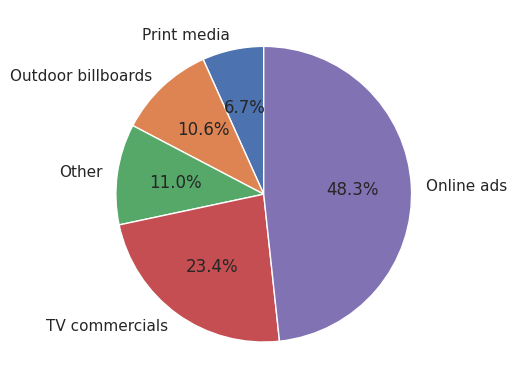

In [ ]:
# Which type of marketing reaches the most to 19-30 group
df.query("Age == '19-30'").groupby(['Marketing_channels']).size().sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=90)
fig.show()
# => Online ads with 48.3%

In summary, male customers account for the majority with 60%, followed by women with 35% and the remainder is determined to be 5%. According to the survey, the majority of customers are concentrated between the ages of 19 and 30 with 55%. Combining the above two factors, it can be concluded that men between the ages of 19 and 30 are likely to be the main audience for the energy drinks marketing plan.

Besides, thanks to understanding geographical location and marketing channels. We can identify Online Advertising and TV Advertising as the two main channels to reach customers in the three cities which is recorded to have the largest number of customers (Bangalore, Hyderabad and Mumbai) with more than 61% client.

##### 2.2 Customer Preferences

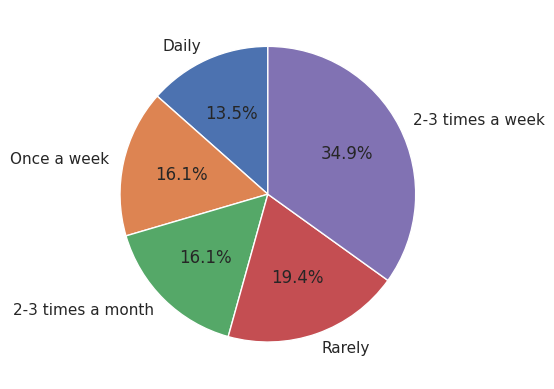

In [ ]:
# Consume frequency
# Frequency Scale:
# Highest =  Daily
# 2nd = 2-3 times a week
# 3rd = Once a week
# 4th = 2-3 times a month
# Lowest = Rarely
df['Consume_frequency'].value_counts().sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

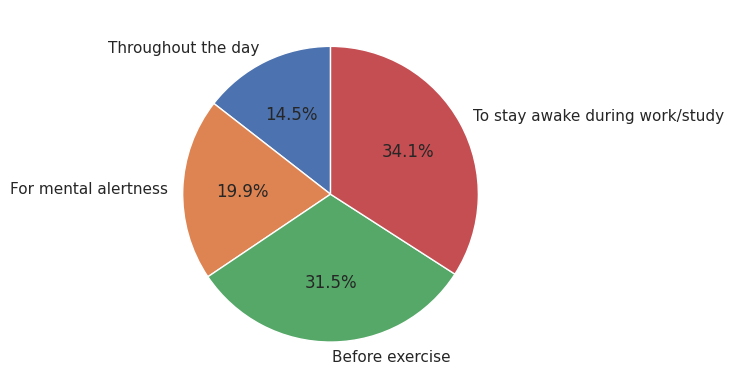

In [ ]:
# Consume time
df['Consume_time'].value_counts().sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

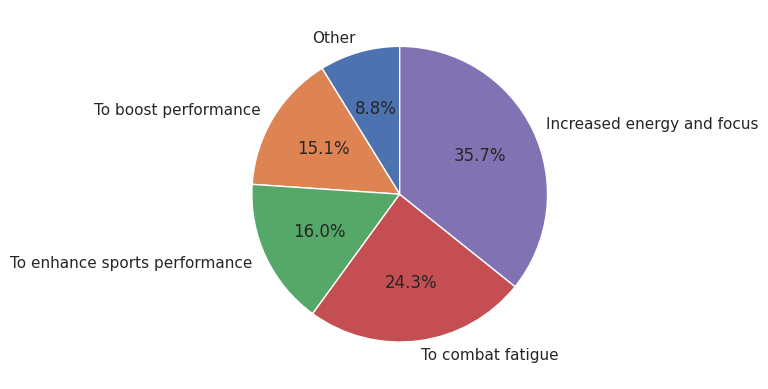

In [ ]:
# Consume reason
df['Consume_reason'].value_counts().sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

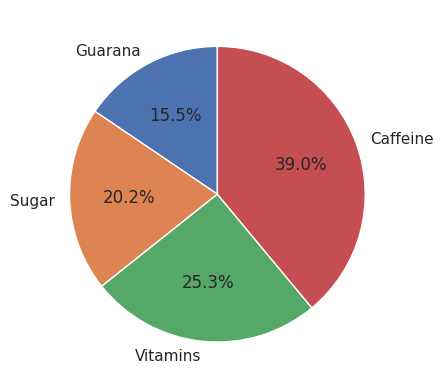

In [ ]:
# Which ingredients in energy drinks are most preferred by customers?
df['Ingredients_expected'].value_counts().sort_values(ascending=True).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
fig.show()

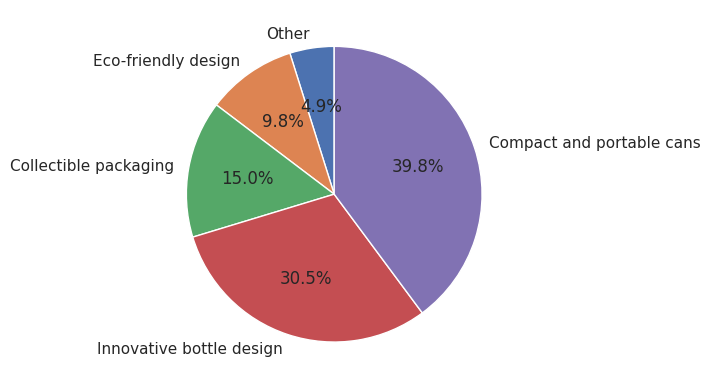

In [ ]:
# What packaging preferences do respondents have for energy drinks?
df['Packaging_preference'].value_counts().sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
fig.show()

In [ ]:
# Purchase behavior: Where to buy?
df['Purchase_location'].value_counts()

Supermarkets                4494
Online retailers            2550
Gyms and fitness centers    1464
Local stores                 813
Other                        679
Name: Purchase_location, dtype: int64

<Axes: >

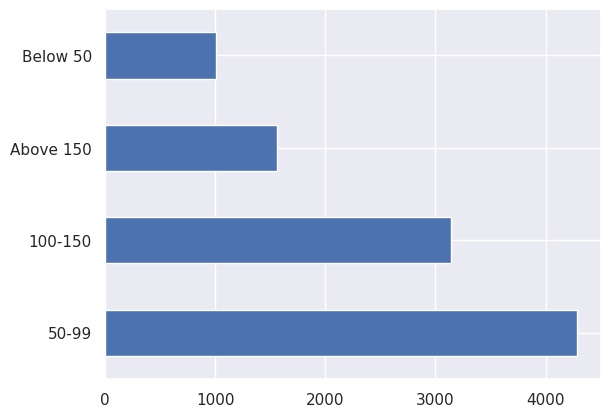

In [ ]:
# Purchase behavior: How much will they spend?
df['Price_range'].value_counts().plot.barh()

Based on the survey, nearly 50% of consumers regularly use energy drinks (Daily and 2-3 times a week). The number of people who use energy drinks once a week accounts for 16.1% and the number of people who rarely use energy drinks accounts for about 35.5%.

To dig deeper, we asked them what time of day they most often use energy drinks. 34.1% of survey respondents said they often use it to stay awake during work or study and 31.5% said it is before exercise sessions. These two groups account for the majority (61.6%) of the responses. Besides, for mental alertness is 20% and throughout the day is 14.5%

Regarding the reason for using energy drinks, similar to the answer about consume time, most users choose to use energy drinks to increase concentration to eliminate fatigue at work or study. 16% of users choose to improve their strength while playing sports. To boost performance is 15.1% and other is 8.8%.

The observed energy drink ingredient preferences were as follows: 39% preferred caffeine, 25.3% preferred vitamins, 20.2% preferred sugar, and 15.5% preferred guarana.

In a sample of 10,000 consumers, energy drink packaging preferences were distributed as follows: 39.8% preferred compact and portable cans, 30.5% preferred innovative bottle designs, 15% choose collectible packaging, 9.8% choose eco-friendly design and 4.9% express a preference for other options.

Regarding consumer behavior, most customers will choose to buy at supermarket or order online. These two options are quite familiar in the F&B industry as these are the two most popular channels. Purchases at gym, local stores or others are only a small portion.



##### 2.3 Competition Analysis

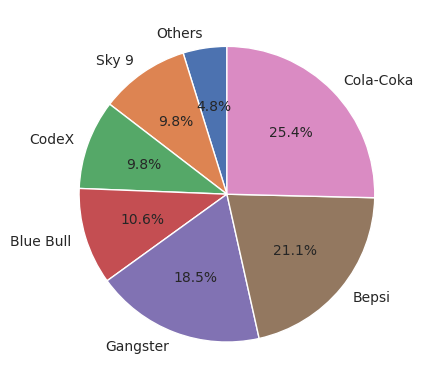

In [ ]:
# Market share based on people choice
df['Current_brands'].value_counts().sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=90,fontsize=10)
plt.ylabel('')
plt.show()

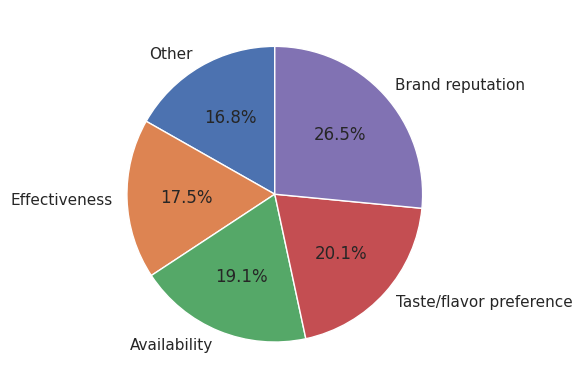

In [ ]:
# What are the main reason for them to choose a drink?
df['Reasons_for_choosing_brands'].value_counts().sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

In [ ]:
# Brands rating (Other drinks option will not be counted because it's undefined)
print('Cola-Coka: ',round(df.query("Current_brands == 'Cola-Coka'")['Taste_experience'].mean(),2))
print('Bepsi: ',round(df.query("Current_brands == 'Bepsi'")['Taste_experience'].mean(),2))
print('Gangster',round(df.query("Current_brands == 'Gangster'")['Taste_experience'].mean(),2))
print('Blue Bull',round(df.query("Current_brands == 'Blue Bull'")['Taste_experience'].mean(),2))
print('CodeX',round(df.query("Current_brands == 'CodeX'")['Taste_experience'].mean(),2))
print('Sky 9',round(df.query("Current_brands == 'Sky 9'")['Taste_experience'].mean(),2))

Cola-Coka:  3.3
Bepsi:  3.28
Gangster 3.24
Blue Bull 3.3
CodeX 3.27
Sky 9 3.3


In the energy drink market in India, the top three industry leaders are named Cola-Coka with 25.4% market share, second place belongs to Bepsi with 21% and lastly is Gangster with 18.5%. Our company, the Codex holds a 9.8% contributing to the competitive landscape.

In addition, when asked what is the main reason for choosing the energy drinks, there are 3 main reasons mentioned. These are brand reputation and popularity (26.5%), drink taste (20.1%), and availability (19.1%).

Based on the average score that customers rate in the survey. Most brands have nearly the same score, ranging from 3.24 to 3.3. Shows that this market still has potential if we improve the quality of energy drinks CodeX

##### 2.4 Marketing Channels and Brand Awareness

Based on the result above, we clearly know that Online Ads and TV Commercials are the most popular and effective marketing channel in India. So, in this part, let's compare the effectiveness of those marketing channels on our brand. Are they really effective and suitable for CodeX?

In [ ]:
df['CodeX_vs_others'] = np.where(df['Current_brands']=='CodeX','CodeX','Others')

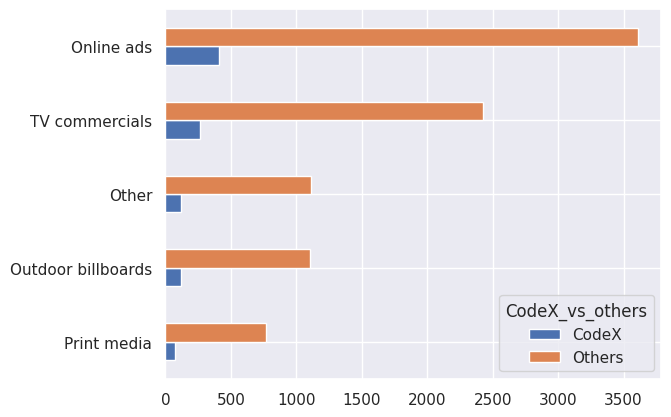

In [ ]:
pd.crosstab(index=df['Marketing_channels'], columns=df['CodeX_vs_others'], values=df['Response_ID'], aggfunc='count').sort_values('Others',ascending=True).plot.barh()
plt.ylabel('')
plt.show()

Through the two charts above, CodeX and other brands have no difference. Online Ads and TV Commercials are still the two main channels in reaching potential customers.

##### 2.5 Brand Penetration

In [ ]:
# How many people are using our product
a = len(df.query("Current_brands =='CodeX'"))
print('The no of ppl are using: {}'.format(a))
print('CodeX contribution: {}%'.format(a/len(df)*100))

The no of ppl are using: 980
CodeX contribution: 9.8%


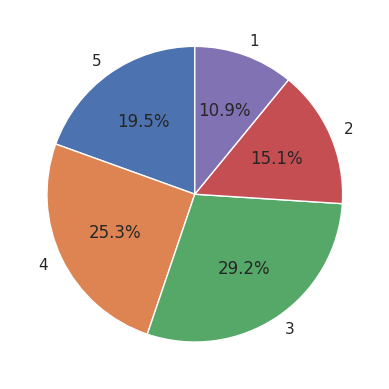

In [ ]:
#What do people think about our brand? (overall rating)
df.query("Current_brands=='CodeX'")['Taste_experience'].value_counts().sort_index(ascending=False).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

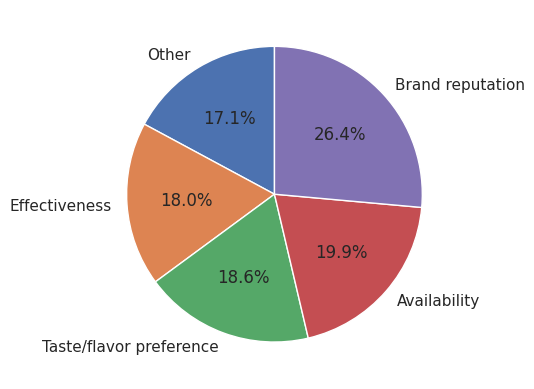

In [ ]:
# Reasons for choosing our brands
df.query("Current_brands == 'CodeX'")['Reasons_for_choosing_brands'].value_counts().sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

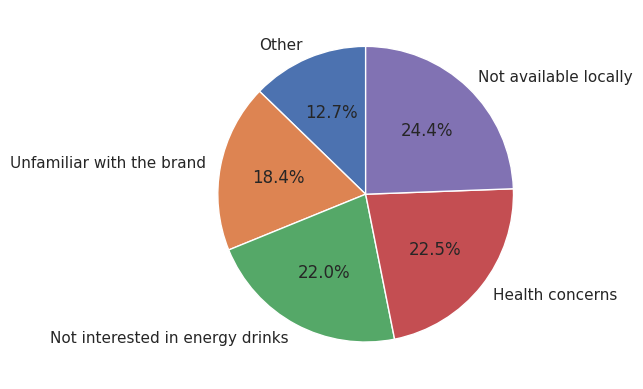

In [ ]:
# Reasons for not choosing our brands
df.query("Current_brands != 'CodeX'")['Reasons_preventing_trying'].value_counts().sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

In a sample of 10,000 consumers, there are 980 users currently using CodeX products (accounting for 9.8%). Based on their feelings, our drink is at a neutral level (from 3 to 4 points based on a 5-point scale). However, according to the survey, the highest score is nearly 20%, showing that our drink has relatively high potential even though it has only appeared in the past few months.

Regarding the reasons why they choose our products, 26.5% of consumers choose Brand Reputation, 19.9% choose Availability, 18.6% choose Flavor/taste preference, Effectiveness is 18% and other reasons account for 17.1%.

Why they don't trust CodeX products? The answer we get the most is Not available locally (24.4%). This is understandable because our product has only recently launched. Next is Health concerns with 22.5%, 22% of customers feel they do not like using energy drinks. With a new brand appearing, we have to accept the fact that there will be a number of customers who are not familiar with CodeX, and this number accounts for 18.4% of the survey respondents. In addition, there are a number of other reasons accounting for 12.7%.


##### 2.6 CodeX Product Development

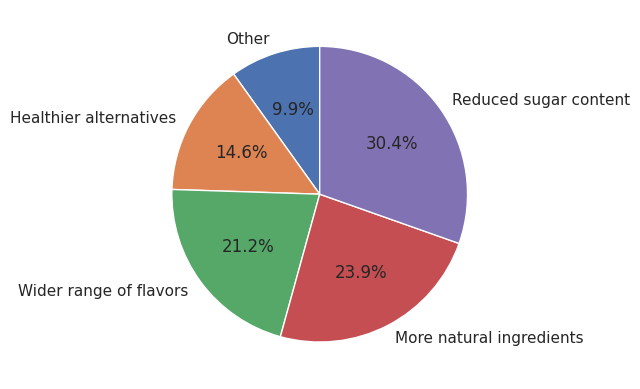

In [ ]:
# Customers desire for improvement
df.query("Current_brands == 'CodeX'")['Improvements_desired'].value_counts().sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

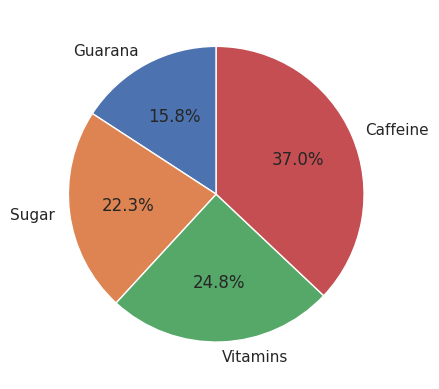

In [ ]:
# The ingredients in energy drinks that customers need and expect
df.query("Current_brands == 'CodeX'")['Ingredients_expected'].value_counts().sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

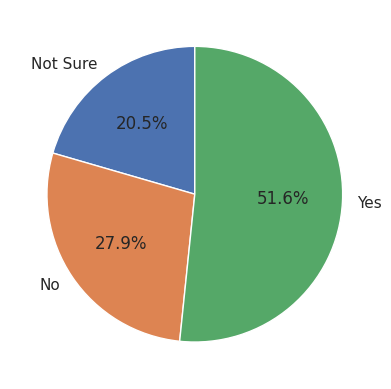

In [ ]:
# Are they interested in natural or organic?
df.query("Current_brands == 'CodeX'")['Interest_in_natural_or_organic'].value_counts().sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

In order to improve product quality, we asked some questions about the needs and wants of our current customer base.
- First, in terms of improving quality, 30.4% of users want us to reduce the amount of sugar in drinks. 23.9% of people would feel happier if we added more natural ingredients. 21.2% of users want more flavor, 14.6% want our drinks to be healthier and 9.9% other reasons
- Second, about ingredients in drinks. The majority choose Caffeine and Vitamins (37% and 24.8%), Sugar is 22.3% and Guarana is 15.8%.
- Third, are our customers interested in natural or organic? 51.6% of people chose Yes, 27.9% chose No and 20.5% of people were uncertain and unclear about the benefits or effects of these substances.

#### **3. Conclusion**

Considering data analytics, product development efforts should primarily focus on addressing availability concerns and Brand promotion. Enhancing flavor experiences that suit different preferences while increasing product availability and brand visibility can overcome barriers to trial. Leveraging effective marketing channels will further amplify your brand's reach. A balanced approach that includes brand, flavor and availability can lead to comprehensive product development and successful market penetration.